In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [81]:
from google.colab import files
uploaded = files.upload()

import io
attrition_data = pd.read_csv(io.BytesIO(uploaded['HR-Employee-Attrition.csv']))

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (2).csv


In [82]:
attrition_data.head().transpose()

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


In [83]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [84]:
attrition_data.shape

(1470, 35)

Load the data and perform EDA.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

1. Evaluate missing values
2. Assess target class distribution
3. Assess information value of individual features (correlation analysis and pairlot).

5 pts.


### Evaluating missing values using heatmap

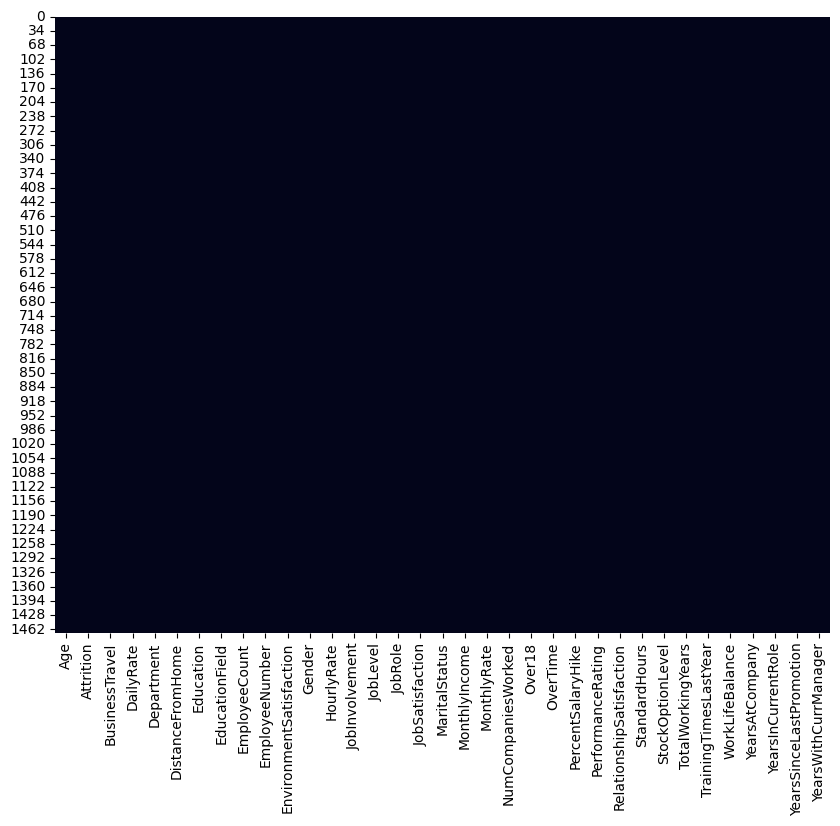

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(attrition_data.isnull(), cbar=False)
plt.show()


### Assessing target class distribution

mean:  0.16122448979591836


<Axes: >

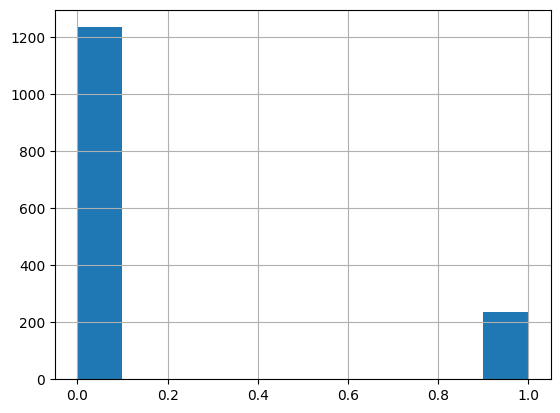

In [86]:
attrition_data = pd.get_dummies(attrition_data)
print("mean: ", attrition_data.Attrition_Yes.mean())
attrition_data["Attrition_Yes"].hist()

This is an imbalanced dataset

### Assessing information value of individual features (correlation analysis and pairlot)

<Axes: >

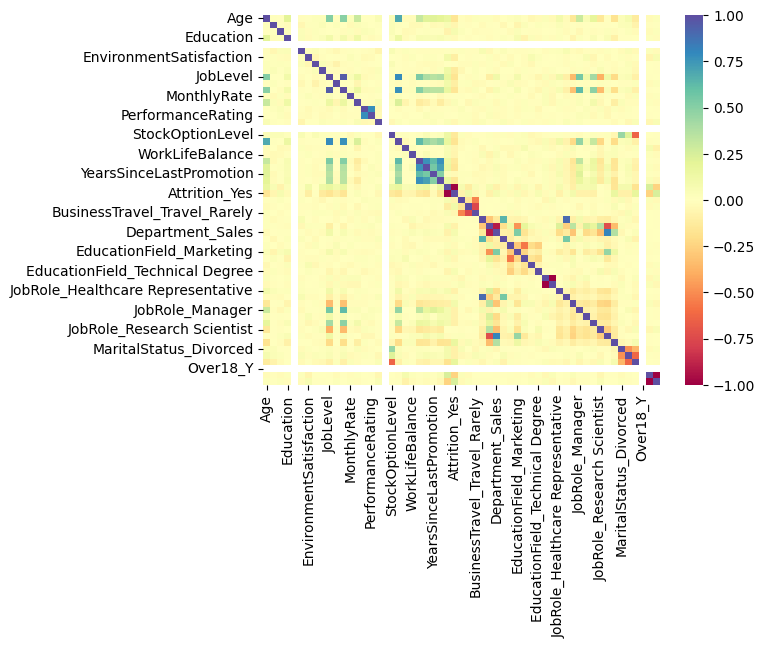

In [87]:
sns.heatmap(attrition_data.corr(), cmap="Spectral")

In [88]:
attrition_data.corr()['Attrition_Yes'].sort_values(ascending=False)

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                 

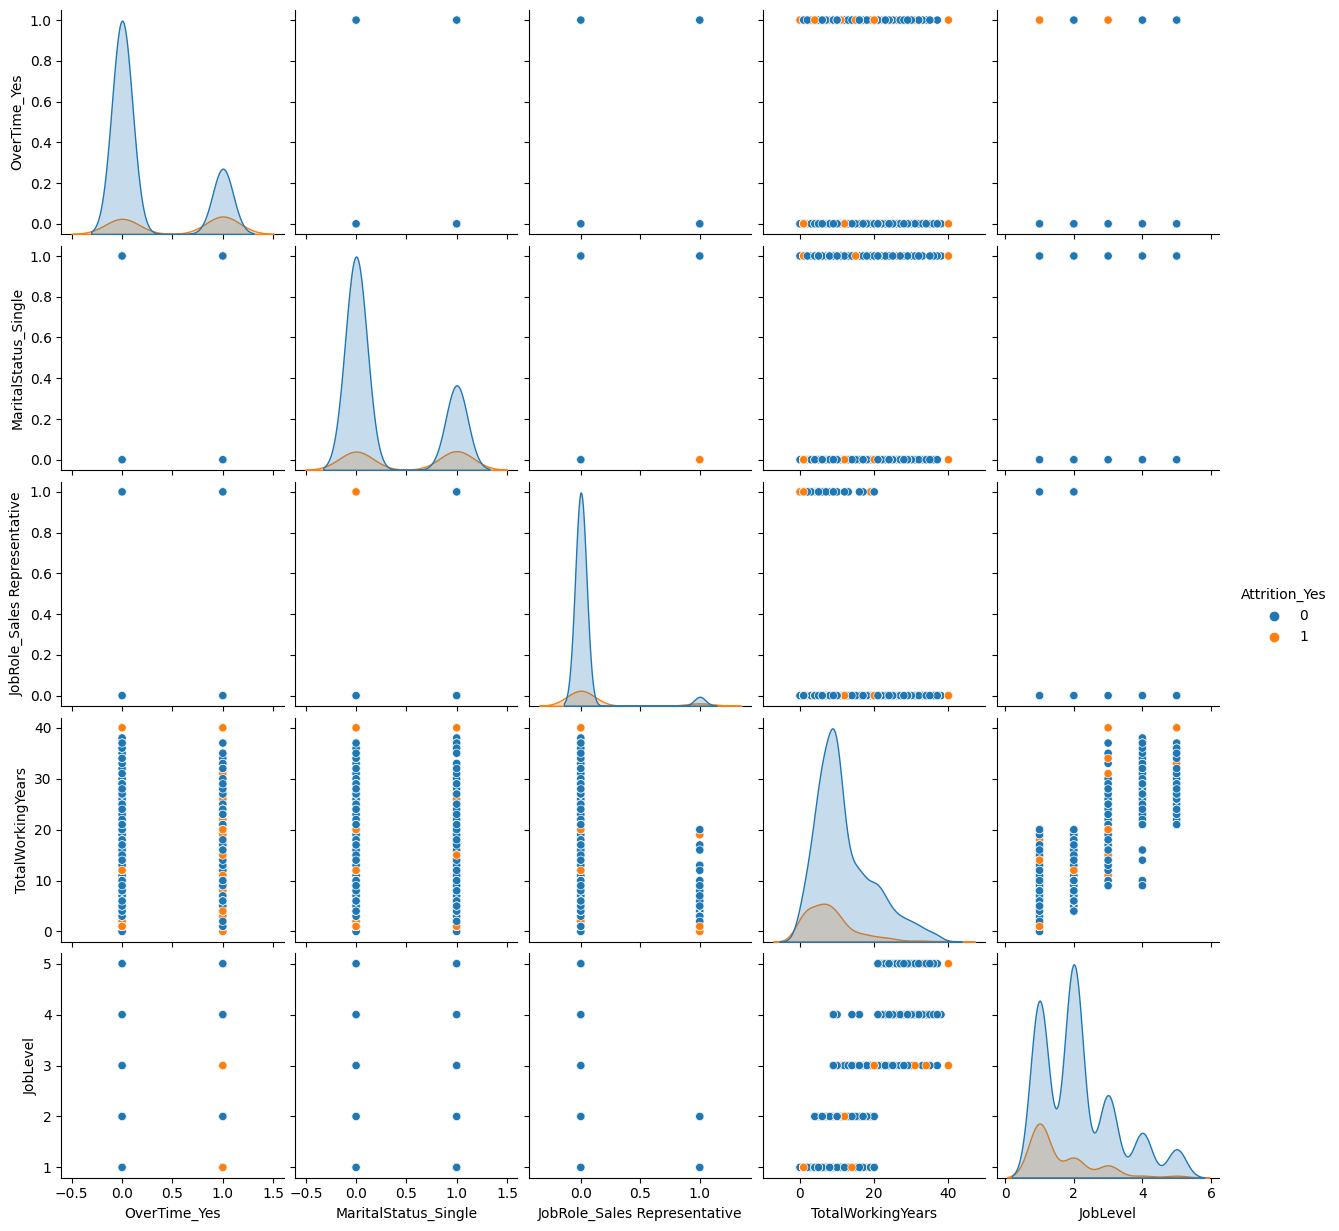

In [89]:
sns.pairplot(attrition_data[['Attrition_Yes',"OverTime_Yes","MaritalStatus_Single","JobRole_Sales Representative",
                             "TotalWorkingYears","JobLevel"]],hue="Attrition_Yes")

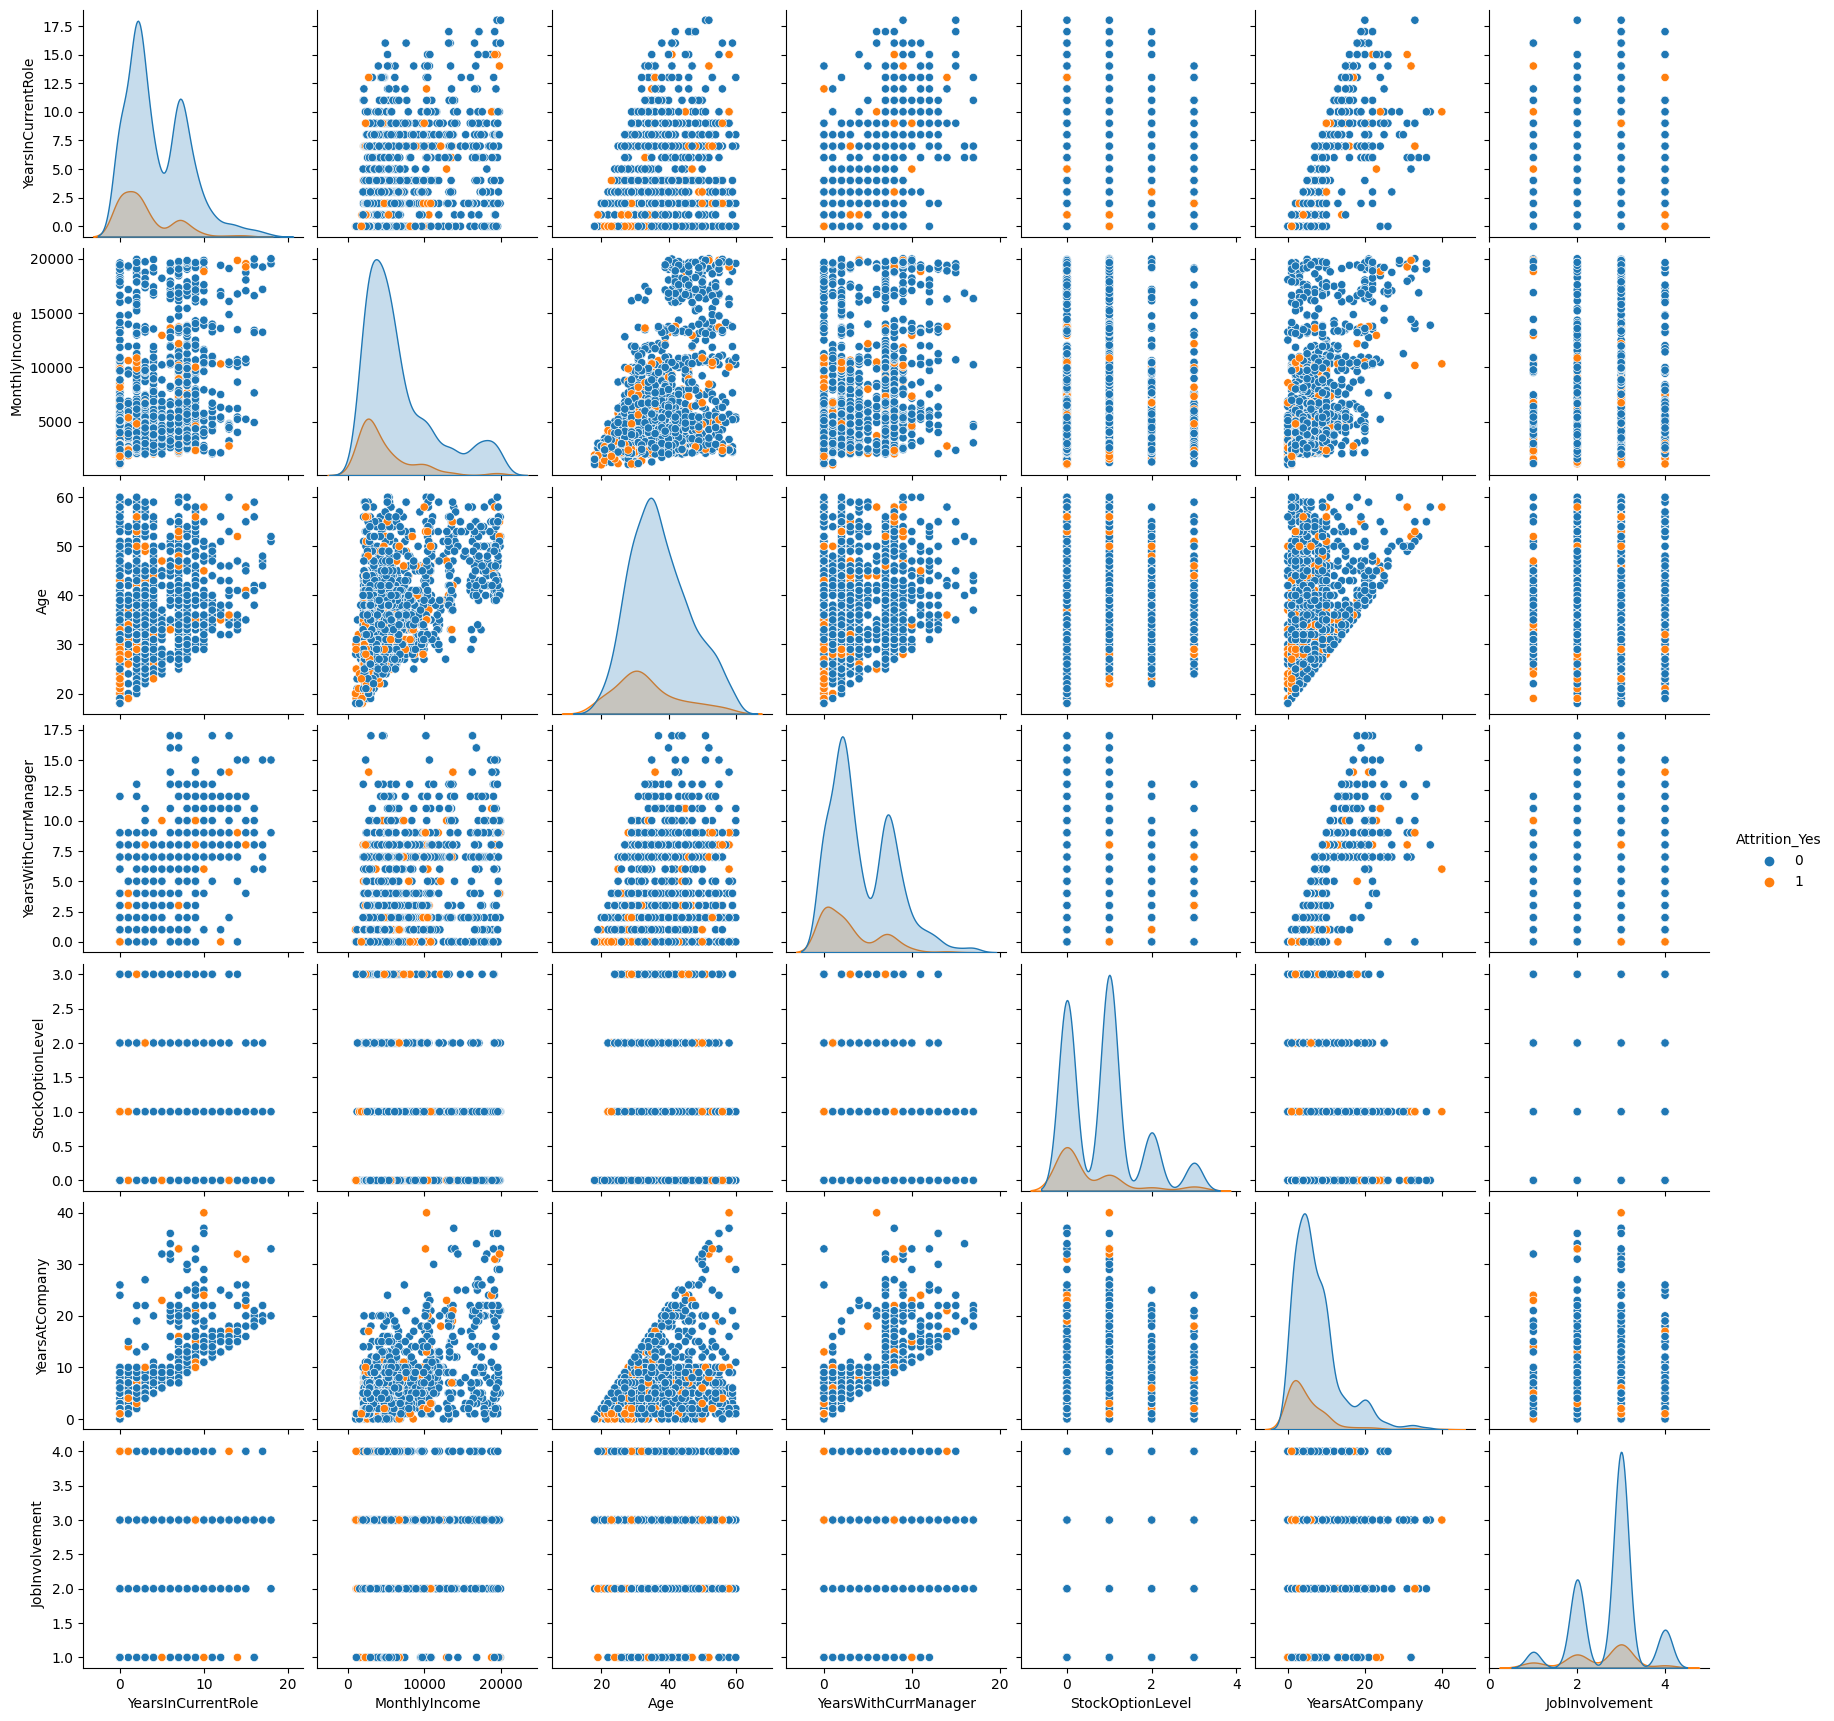

In [90]:
sns.pairplot(attrition_data[["Attrition_Yes","YearsInCurrentRole","MonthlyIncome","Age","YearsWithCurrManager","StockOptionLevel",
                             "YearsAtCompany","JobInvolvement"]],hue="Attrition_Yes")

4. Pre-process the dataset
5. Split the data into training/test datasets (70/30)

4 pts.

### Pre-processing the dataset

In [91]:
# removing the columns since there is 0 correlation and variance. 
attrition_data = attrition_data.drop(['EmployeeCount','StandardHours','Over18_Y'], axis=1)
# removing the columns that are redundant and not needed to predict the target
attrition_data = attrition_data.drop(['Attrition_No','EmployeeNumber'], axis=1)


In [92]:

attrition_data[['WorkLifeBalance','JobSatisfaction','JobLevel','JobInvolvement','RelationshipSatisfaction','EnvironmentSatisfaction','PerformanceRating']] =  attrition_data[['WorkLifeBalance','JobSatisfaction','JobLevel','JobInvolvement','RelationshipSatisfaction','EnvironmentSatisfaction','PerformanceRating']].astype('category',copy=False)
attrition_data.rename(columns={"Attrition_Yes": "Attrition"}, inplace=True)

attrition_data_cleaned = pd.get_dummies(attrition_data)


In [93]:
attrition_data_cleaned.shape

(1470, 72)

### Spliting the data into training/test datasets (70/30)

In [94]:
X = attrition_data_cleaned.drop("Attrition",axis=1).values
y = attrition_data_cleaned["Attrition"].values

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)


6. Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
7. Use early stopping callback to prevent overfitting.

7 pts.

### Building a sequential neural network with the following parameters: 3 hidden dense layers - 70, 35, 18 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer)

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [98]:
X_train.shape

(1029, 71)

In [99]:
model = Sequential()
model.add(Dense(units=70,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=35,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=18,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

### Using early stopping callback to prevent overfitting

In [100]:
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [102]:
model.fit(x=X_train, 
          y=y_train, 
          batch_size=64,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
17/17 [==============================] - 1s 13ms/step - loss: 0.7909 - val_loss: 0.5739
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 0.5945 - val_loss: 0.4849
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5631 - val_loss: 0.4528
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4971 - val_loss: 0.4436
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4853 - val_loss: 0.4356
Epoch 6/200
17/17 [==============================] - 0s 5ms/step - loss: 0.5075 - val_loss: 0.4271
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.4739 - val_loss: 0.4219
Epoch 8/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4379 - val_loss: 0.4116
Epoch 9/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4380 - val_loss: 0.4071
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.4452 - val_loss: 0.4022
Epoch 11

8. Plot training and validation losses versus epochs.
9. Print out model confusion matrix.
10. Print out model classification report.
11. Print out model ROC AUC.

4 pts.

### Plotting the training and validation losses versus epochs.

<Axes: >

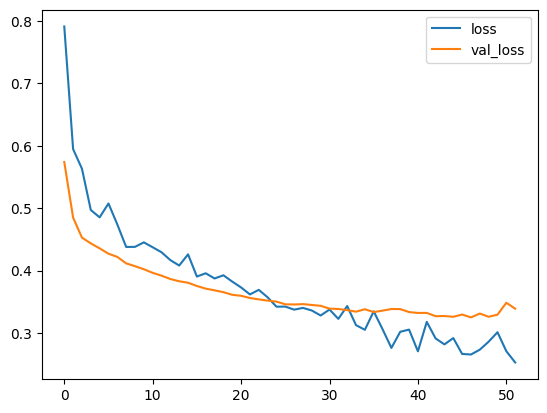

In [103]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Confusion matrix

In [104]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

In [105]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

14/14 [==============================] - 0s 2ms/step


In [106]:
print(confusion_matrix(y_test,y_pred))

[[349  15]
 [ 46  31]]


### Classification Report

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       364
           1       0.67      0.40      0.50        77

    accuracy                           0.86       441
   macro avg       0.78      0.68      0.71       441
weighted avg       0.85      0.86      0.85       441



### ROC AUC

In [108]:
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

14/14 [==============================] - 0s 2ms/step
ROC AUC:  0.8445839874411302
